# Solar Data from Gridded Atmospheric Wind Integration National Dataset
---

**NREL**: National Renewable Energy Laboratory

**WIND**: Wind Integration National Dataset  
Information can be found at: https://www.nrel.gov/grid/wind-toolkit.html  
HSDS API: https://github.com/NREL/hsds-examples


The gridded atmospheric WIND toolkit is used for this analysis. It consists of a 50-TB subset containing 1-hour resolution data for 7 years on a uniform 2-km grid that covers the continental U.S., the Baja Peninsula, and parts of the Pacific and Atlantic oceans.

In [1]:
from powersimdata.input.grid import Grid
from prereise.gather.solardata.ga_wind import ga_wind
from prereise.gather.solardata.helpers import to_reise

from getpass import getpass
from matplotlib import pyplot

## 1. Solar Plants in Network

In [2]:
grid = Grid("Western")
solar_plant = grid.plant.groupby('type').get_group('solar')

Reading bus.csv
Reading plant.csv
Reading gencost.csv
Reading branch.csv
Reading dcline.csv
Reading sub.csv
Reading bus2sub.csv
Reading zone.csv


In [3]:
solar_plant.head()

,bus_id,Pg,Qg,Qmax,Qmin,Vg,mBase,status,Pmax,Pmin,...,type,interconnect,GenFuelCost,GenIOB,GenIOC,GenIOD,zone_id,zone_name,lat,lon
plant_id,,,,,,,,,,,,,,,,,,,,,
10441,2010760,0.00,0.0,0.0,0.0,1.0400,69.12,0,61.500,13.060,...,solar,Western,0.0,0.0,0.0,0,201,Washington,45.5847,-122.406
10447,2010776,0.00,0.0,0.0,0.0,1.0318,32.07,0,28.000,3.770,...,solar,Western,0.0,0.0,0.0,0,201,Washington,48.4481,-122.433
10448,2010776,14.32,0.0,0.0,0.0,1.0318,23.98,1,20.000,6.145,...,solar,Western,0.0,0.0,0.0,0,201,Washington,48.4481,-122.433
10451,2010782,13.43,0.0,0.0,0.0,1.0156,27.32,1,18.333,6.397,...,solar,Western,0.0,0.0,0.0,0,201,Washington,46.1039,-122.918
10452,2010782,14.65,0.0,0.0,0.0,1.0156,18.63,1,18.333,7.371,...,solar,Western,0.0,0.0,0.0,0,201,Washington,46.1039,-122.918


In [4]:
print("There are %d solar plants in the Western interconnection." % len(solar_plant))

There are 433 solar plants in the Western interconnection.


## 2. Downloading Data
Get an API key at the following URL: https://developer.nrel.gov/signup/.

In [5]:
key = getpass(prompt='api_key=')
data = ga_wind.retrieve_data(solar_plant, key, start_date='2012-06-01', end_date='2012-07-01')

api_key=········


100%|██████████| 173/173 [01:21<00:00,  2.28it/s]


In [6]:
data.tail(n=20)

,Pout,plant_id,ts,ts_id
311740,0.248207,13973,2012-06-30 23:00:00,720
311741,0.689097,13974,2012-06-30 23:00:00,720
311742,0.739188,13975,2012-06-30 23:00:00,720
311743,0.682465,13976,2012-06-30 23:00:00,720
311744,0.696706,13977,2012-06-30 23:00:00,720
311745,0.730813,13978,2012-06-30 23:00:00,720
311746,0.584656,13979,2012-06-30 23:00:00,720
311747,0.739188,13980,2012-06-30 23:00:00,720
311748,0.749333,13981,2012-06-30 23:00:00,720
311749,0.738749,13982,2012-06-30 23:00:00,720


## 3. Plot Data
One solar plant is selected. The power output (in MW) is then plotted for the entire year for 72-h in June.

In [7]:
plant_id = 12400
data_oneplant = data[data.plant_id == plant_id].set_index("ts", drop=True).drop(
    ["plant_id", "ts_id"], axis=1) * solar_plant.loc[plant_id, "Pmax"]

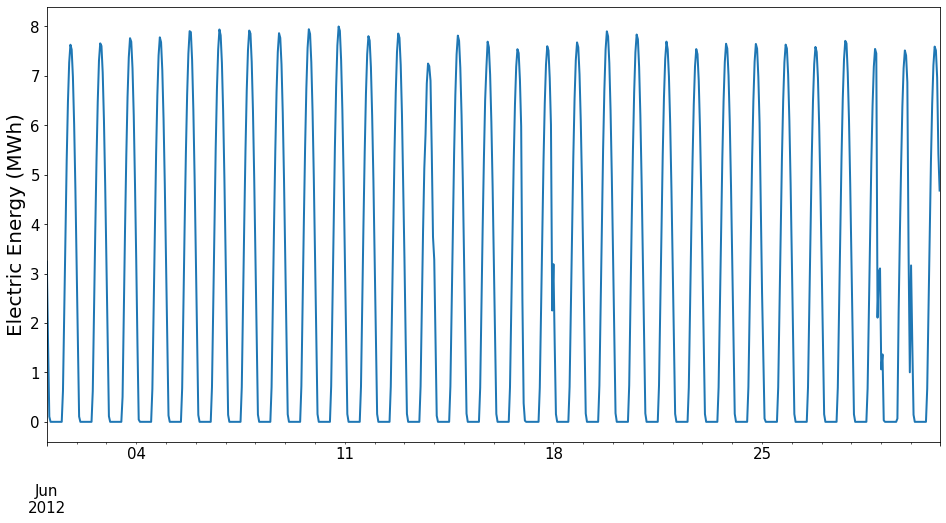

In [8]:
fig = pyplot.figure(figsize=(16,8))
ax = fig.gca()
data_oneplant.plot(ax=ax, legend=False, fontsize=15, lw=2)
ax.set_xlabel('')
ax.set_ylabel('Electric Energy (MWh)', fontsize=20)
pyplot.show()

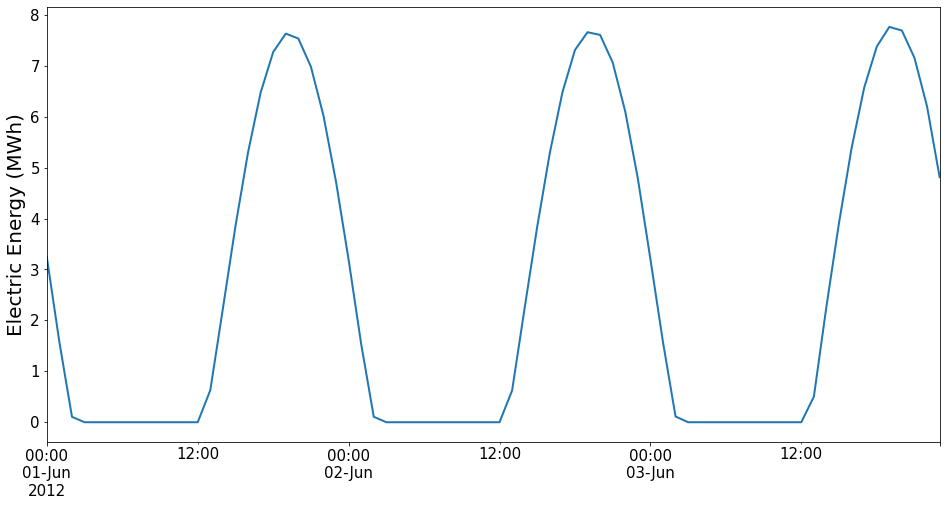

In [9]:
fig = pyplot.figure(figsize=(16,8))
ax = fig.gca()
data_oneplant[:72].plot(ax=ax, legend=False, fontsize=15, lw=2)
ax.set_xlabel('')
ax.set_ylabel('Electric Energy (MWh)', fontsize=20)
pyplot.show()

## 4. Format Data
Data are formated for REISE.

In [10]:
data_reise = to_reise(data)

In [11]:
data_reise.tail()

,10441,10447,10448,10451,10452,10453,10454,10455,10456,10457,...,13983,13984,13985,13986,13987,13988,13989,13990,13991,13992
UTC,,,,,,,,,,,,,,,,,,,,,
2012-06-30 19:00:00,0.878001,0.679417,0.679417,0.103426,0.103426,0.103426,0.737123,0.737123,0.737123,0.737123,...,0.952584,0.954934,0.488290,0.950949,0.955619,0.953383,0.949175,0.970243,0.970243,0.937352
2012-06-30 20:00:00,0.594823,0.831486,0.831486,0.756802,0.756802,0.756802,0.811779,0.811779,0.811779,0.811779,...,0.956328,0.982980,0.860272,0.962703,0.965184,0.971318,0.939508,0.969655,0.969655,0.974280
2012-06-30 21:00:00,0.952647,0.874213,0.874213,0.218411,0.218411,0.218411,0.853343,0.853343,0.853343,0.853343,...,0.902356,0.954975,0.874695,0.917888,0.920101,0.919083,0.871020,0.910435,0.910435,0.953991
2012-06-30 22:00:00,0.873491,0.880173,0.880173,0.868286,0.868286,0.868286,0.865629,0.865629,0.865629,0.865629,...,0.793207,0.871839,0.750395,0.821459,0.822412,0.821610,0.678106,0.800962,0.800962,0.876809
2012-06-30 23:00:00,0.666768,0.184623,0.184623,0.781237,0.781237,0.781237,0.786773,0.786773,0.786773,0.786773,...,0.638736,0.739188,0.586222,0.677652,0.683487,0.677754,0.584967,0.649342,0.649342,0.749023
